In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Convert this cell into code to automatically run the scraper to update the value

%run C:/Users/prath/Desktop/Stock_Predictor/scraper/scraper.ipynb

In [22]:
df = pd.read_csv("historic_data/csv/TCS.NS.csv")

# Drop all rows where volume is 0
df = df[df["Volume"] != 0]

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

# Drop rows with NaN or infinite values
df = df.replace([np.inf, -np.inf], np.nan) # replace inf values with NaN                                                                                                                                                                                                                                                            
df = df.dropna() # drop rows with NaN values

# Convert the date column to ordinal values
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].apply(lambda date: date.toordinal())

# Split the data into features (X) and target (y)
X = df.drop("Adjusted Close", axis=1).sort_values(by="Date")
y = df["Adjusted Close"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the Random Forest Regressor model to the training data
rfr = RandomForestRegressor(n_estimators=10000, min_samples_leaf=10)
rfr.fit(X_train, y_train)


# Predict the stock prices on the testing set
y_pred = rfr.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)


In [23]:
df

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,731074,38.724998,38.724998,212976.0,40.000000,39.700001,28.484995
1,731075,38.875000,39.750000,153576.0,40.387501,39.162498,28.099331
2,731076,35.724998,39.250000,822776.0,39.250000,36.462502,26.162079
4,731078,35.750000,36.275002,811856.0,38.000000,36.375000,26.099285
5,731081,35.137501,36.674999,205880.0,36.674999,35.474998,25.453533
...,...,...,...,...,...,...,...
5150,738635,3147.500000,3183.000000,2024090.0,3191.199951,3176.000000,3176.000000
5151,738636,3181.000000,3181.000000,2000029.0,3208.399902,3198.149902,3198.149902
5152,738637,3170.649902,3185.000000,2434446.0,3199.199951,3187.949951,3187.949951
5153,738638,3196.250000,3200.399902,2931312.0,3227.250000,3219.250000,3219.250000


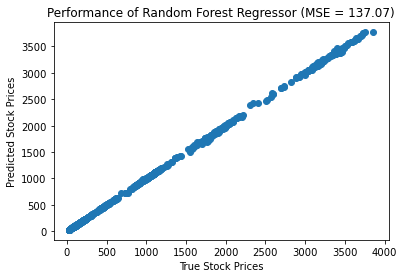

In [24]:
# Plot the true stock prices versus the predicted stock prices
plt.scatter(y_test, y_pred)
plt.xlabel("True Stock Prices")
plt.ylabel("Predicted Stock Prices")
plt.title("Performance of Random Forest Regressor (MSE = %.2f)" % mse)
plt.show()

In [28]:
print(mse**0.5)

11.707566978987817


In [33]:
sorted_series = y_test.sort_index()
last_index2 = sorted_series.index[-1]
last_index1 = sorted_series.index[-2]
idx2 = y_test.index.get_loc(last_index2)
idx1 = y_test.index.get_loc(last_index1)
print("Predicted price of TCS day 1:" ,y_pred[idx2]+mse**0.5)
print("Predicted price of TCS day 2:" ,y_pred[idx1]+mse**0.5)

Predicted price of TCS day 1: 3173.598794784461
Predicted price of TCS day 2: 3147.0989609491758


In [34]:
import pickle

# Assuming that you have already executed the code to get the values
# Store the values in a dictionary
values_dict = {
    'rfr1': y_pred[idx2]+mse**0.5,
    'rfr2': y_pred[idx1]+mse**0.5,
}

# Save the dictionary to a file using pickle
with open('rfr.pickle', 'wb') as f:
    pickle.dump(values_dict, f)
